In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
irx = yf.download(
    "^IRX",
    start="2016-01-01",
    end="2025-12-01",
    interval="1d"
)

irx

/tmp/ipython-input-2489642191.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  irx = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^IRX,^IRX,^IRX,^IRX,^IRX
Date,,,,,
2016-01-04,0.155,0.170,0.153,0.165,0
2016-01-05,0.205,0.205,0.205,0.205,0
2016-01-06,0.205,0.205,0.198,0.205,0
2016-01-07,0.190,0.195,0.185,0.190,0
2016-01-08,0.190,0.195,0.188,0.190,0
...,...,...,...,...,...
2025-11-21,3.740,3.745,3.737,3.740,0
2025-11-24,3.730,3.735,3.723,3.730,0


In [ ]:
print(irx.columns)

MultiIndex([( 'Close', '^IRX'),
            (  'High', '^IRX'),
            (   'Low', '^IRX'),
            (  'Open', '^IRX'),
            ('Volume', '^IRX')],
           names=['Price', 'Ticker'])


In [ ]:
tmp = irx.xs("Close", level="Price", axis=1)

rf = (
    tmp.rename(columns={"^IRX": "RF_3M"})
       .dropna()
)

rf['RF_3M'] = rf['RF_3M'] / 100

rf['rf_daily'] = rf['RF_3M'] / 252

In [ ]:
rf

Ticker,RF_3M,rf_daily
Date,,
2016-01-04,0.00155,0.000006
2016-01-05,0.00205,0.000008
2016-01-06,0.00205,0.000008
2016-01-07,0.00190,0.000008
2016-01-08,0.00190,0.000008
...,...,...
2025-11-21,0.03740,0.000148
2025-11-24,0.03730,0.000148
2025-11-25,0.03732,0.000148


In [ ]:
def get_rf_irx(start, end, freq="daily"):
    irx = yf.download("^IRX", start=start, end=end)

    rf = (
        irx
        .xs("Close", level="Price", axis=1)
        .rename(columns={"^IRX": "RF_3M"})
        .dropna()
    )

    rf["RF_3M"] = rf["RF_3M"] / 100

    if freq == "daily":
        return rf["RF_3M"] / 252
    elif freq == "monthly":
        return rf["RF_3M"].resample("M").last() / 12
    else:
        return rf["RF_3M"]

In [ ]:
get_rf_irx(start="2016-01-01", end="2025-12-01", freq="daily")

/tmp/ipython-input-3234105444.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  irx = yf.download("^IRX", start=start, end=end)
[*********************100%***********************]  1 of 1 completed


,RF_3M
Date,
2016-01-04,0.000006
2016-01-05,0.000008
2016-01-06,0.000008
2016-01-07,0.000008
2016-01-08,0.000008
...,...
2025-11-21,0.000148
2025-11-24,0.000148
2025-11-25,0.000148


In [ ]:
rf.to_csv("rf_3m_tbill_daily.xlsx", index=True)

In [ ]:
spy = yf.download(
    "SPY",
    start="2016-01-01",
    end="2025-12-01",
    interval="1d",
    auto_adjust=True
)

spy = spy[['Close']].rename(columns={'Close': 'SPY_Close'})
spy = spy.dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
spy['ret_daily'] = spy['SPY_Close'].pct_change()
spy = spy.dropna()
spy['equity_bh'] = (1 + spy['ret_daily']).cumprod()

In [ ]:
spy.columns = [
    "_".join(col).strip() if isinstance(col, tuple) else col
    for col in spy.columns
]

In [ ]:
spy

,SPY_Close_SPY,ret_daily_,equity_bh_
Date,,,
2016-01-05,171.164581,0.001691,1.001691
2016-01-06,169.005478,-0.012614,0.989056
2016-01-07,164.950882,-0.023991,0.965327
2016-01-08,163.140244,-0.010977,0.954731
2016-01-11,163.301651,0.000989,0.955676
...,...,...,...
2025-11-21,659.030029,0.009961,3.856783
2025-11-24,668.729980,0.014719,3.913549
2025-11-25,675.020020,0.009406,3.950359


In [ ]:
df = spy.join(rf['rf_daily'], how='inner')

In [ ]:
df

,SPY_Close_SPY,ret_daily_,equity_bh_,rf_daily
Date,,,,
2016-01-05,171.164581,0.001691,1.001691,0.000008
2016-01-06,169.005478,-0.012614,0.989056,0.000008
2016-01-07,164.950882,-0.023991,0.965327,0.000008
2016-01-08,163.140244,-0.010977,0.954731,0.000008
2016-01-11,163.301651,0.000989,0.955676,0.000007
...,...,...,...,...
2025-11-21,659.030029,0.009961,3.856783,0.000148
2025-11-24,668.729980,0.014719,3.913549,0.000148
2025-11-25,675.020020,0.009406,3.950359,0.000148


In [ ]:
ann_ret = df['equity_bh_'].iloc[-1] ** (252 / len(df)) - 1
ann_vol = df['ret_daily_'].std() * (252 ** 0.5)

In [ ]:
sharpe = (
    (df['ret_daily_'] - df['rf_daily']).mean()
    / df['ret_daily_'].std()
) * (252 ** 0.5)

cummax = df['equity_bh_'].cummax()
drawdown = df['equity_bh_'] / cummax - 1
max_dd = drawdown.min()

summary = pd.Series({
    "Annual Return": ann_ret,
    "Annual Volatility": ann_vol,
    "Sharpe Ratio": sharpe,
    "Max Drawdown": max_dd
})

print(summary)

Annual Return        0.150599
Annual Volatility    0.180723
Sharpe Ratio         0.749618
Max Drawdown        -0.337173
dtype: float64


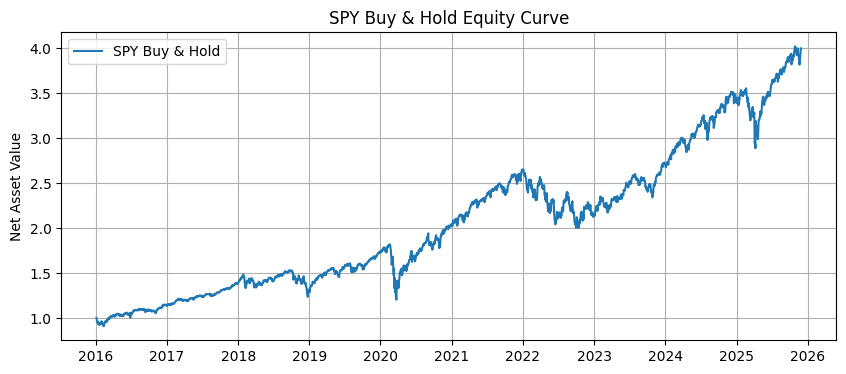

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['equity_bh_'], label='SPY Buy & Hold')
plt.title("SPY Buy & Hold Equity Curve")
plt.ylabel("Net Asset Value")
plt.legend()
plt.grid(True)
plt.show()